<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Prueba-T-Student" data-toc-modified-id="Prueba-T-Student-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Prueba T-Student</a></span></li><li><span><a href="#Prueba-Z" data-toc-modified-id="Prueba-Z-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prueba Z</a></span></li><li><span><a href="#Prueba-de-proporciones" data-toc-modified-id="Prueba-de-proporciones-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Prueba de proporciones</a></span></li><li><span><a href="#Análisis-de-varianza-(ANOVA)" data-toc-modified-id="Análisis-de-varianza-(ANOVA)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Análisis de varianza (ANOVA)</a></span></li><li><span><a href="#Regresión-Lineal" data-toc-modified-id="Regresión-Lineal-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Regresión Lineal</a></span></li></ul></div>

In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np


# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Realizar los distintos test
# ------------------------------------------------------------------------------

from scipy.stats import ttest_ind, norm, chi2_contingency, f_oneway
from sklearn.linear_model import LinearRegression


# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Prueba T-Student

**Cuando la usaremos** :
- Se utiliza cuando no conocemos la desviación estándar de la población.

- Es apropiada para muestras pequeñas (generalmente n < 30).

- Cuando se cumplen todas los supuestos (normalidad, homogeneidad de varianzas e independencia). 

Supongamos que eres una analista de marketing digital que trabaja para una empresa de comercio electrónico. Recientemente, has realizado una actualización en el diseño de los anuncios en línea de la plataforma, y ahora estás interesada en evaluar si la nueva versión de los anuncios tiene un impacto significativo en la tasa de clics (CTR) en comparación con la versión anterior.

Para realizar esta evaluación, has implementado un A/B test, donde has dividido aleatoriamente a los usuarios en dos grupos: el grupo de control, que ve la versión antigua del anuncio, y el grupo de prueba, que ve la nueva versión del anuncio. Cada grupo está compuesto por 1000 usuarios.

- **Hipótesis Nula (H0):** No hay diferencia significativa en las tasas de clics entre el grupo de control y el grupo de prueba.

- **Hipótesis Alternativa (H1):** Hay una diferencia significativa en las tasas de clics entre el grupo de control y el grupo de prueba.

Para realizar esta prueba usaremos el método `ttest_ind`. Su sintaxis básica :

```python
ttest_ind(a, b, equal_var=True, alternative='two-sided')

t_stat, p_value = ttest_ind(grupo1, grupo2)
```

Donde: 
- `a` y `b`: Son las dos muestras que deseas comparar.

- `equal_var`: Es un parámetro opcional que indica si se debe asumir igualdad de varianzas. Por defecto es True.

- `alternative` (opcional): Indica la hipótesis alternativa ('two-sided', 'less', o 'greater'). Por defecto es 'two-sided'.

**Los resultados que obtenemos son**:

- **t_stat:** Este es el valor estadístico de la prueba t de Student. Cuanto mayor sea este valor (en términos absolutos), más evidencia hay en contra de la hipótesis nula.

- **p_value:** Este es el valor p de la prueba. Representa la probabilidad de obtener un valor estadístico tan extremo como el observado, bajo la hipótesis nula. 

**Interpretación:**

- Si `p_value < 0.05`: Rechazamos la hipótesis nula. Hay evidencia suficiente para decir que hay una diferencia significativa entre las dos muestras.

- Si `p_value >= 0.05`: No hay evidencia suficiente para rechazar la hipótesis nula. No podemos afirmar que haya una diferencia significativa entre las dos muestras.

In [2]:
# crear un diccionario con dos columnas, la del grupo a la que pertecen y otra con los valores de CTR (con una distribución normal)
data_t = {'Group': ['Control'] * 25 + ['Test'] * 25,
        'CTR': np.concatenate([np.random.normal(0.02, 0.01, 25),
                               np.random.normal(0.025, 0.01, 25)])}

df_t = pd.DataFrame(data_t)
df_t.head()

,Group,CTR
0,Control,0.011474
1,Control,0.035303
2,Control,0.033873
3,Control,0.010277
4,Control,0.021153


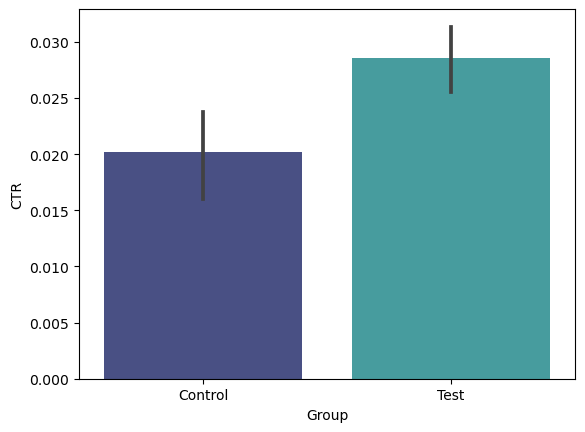

In [3]:
# antes de hacer la prueba estadística vemos si visualmente vemos diferencias entre los grupos
sns.barplot(x="Group", y="CTR", data=df_t,  palette = "mako");

In [4]:
# Al igual que en el ejemplo del jupyter principal, debemos dividir los datos en grupo control y test
control_group_t = df_t[df_t['Group'] == 'Control']['CTR']
test_group_t = df_t[df_t['Group'] == 'Test']['CTR']

# utilizando el método 'ttest_ind', evaluamos si los dos grupos son diferentes
t_stat, p_value = ttest_ind(control_group_t, test_group_t)

# Imprimir el resultado de la prueba
if p_value < 0.05:
    print("Hay una diferencia significativa en las tasas de clics entre el grupo de control y el grupo de prueba.")
    print("\n ---------- \n")
    print("""
          Los resultados sugieren que existe evidencia estadística para afirmar que las medias de las muestras son distintas. 
          Por lo tanto, nuestro nuevo sistema tiene los efectos deseados y deberíamos cambiar la nueva versión de anuncios   
          """)
else:
    print("No hay evidencia de una diferencia significativa en las tasas de clics entre los grupos.")
    print("\n ---------- \n")
    print("""
          Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas. 
          Por lo tanto, aunque en la gráfica veamos que hay diferencias entre el grupo "test" y el grupo "control", 
          el análisis estadístico nos sugiera que estas diferencias no son significativas, 
          por lo que la nueva campaña no esta ayudando a nuestro problema.   
          """)


Hay una diferencia significativa en las tasas de clics entre el grupo de control y el grupo de prueba.

 ---------- 


          Los resultados sugieren que existe evidencia estadística para afirmar que las medias de las muestras son distintas. 
          Por lo tanto, nuestro nuevo sistema tiene los efectos deseados y deberíamos cambiar la nueva versión de anuncios   
          


# Prueba Z

**Cuando la usaremos** :
- Se utiliza cuando conocemos la desviación estándar de la población.

- Es apropiada para muestras grandes (generalmente n > 30).

La plataforma de comercio electrónico donde trabajamos quiere mejorar la retención de usuarios en su sitio web, y para ello ha diseñado una nueva versión de la página de inicio. Han realizado un experimento A/B, donde el grupo de control ve la versión actual de la página de inicio, mientras que el grupo de prueba ve la nueva versión.


- **Hipótesis Nula (H0):** No hay diferencia significativa en el tiempo de permanencia entre el grupo de control y el grupo de prueba.

- **Hipótesis Alternativa (H1):** Hay una diferencia significativa en el tiempo de permanencia entre el grupo de control y el grupo de prueba.


**Los resultados que obtenemos son**:

- **Estadístico de Prueba Z (\(Z\)):** Representa cuántas desviaciones estándar está una observación de la media muestral en relación con la hipótesis nula. Un \(Z\) positivo indica que la media muestral está por encima de la media poblacional asumida, mientras que un \(Z\) negativo indica que está por debajo. Cuanto mayor sea el valor absoluto de \(Z\), más evidencia hay en contra de la hipótesis nula.

- **p-value:** Representa la probabilidad de obtener un estadístico de prueba \(Z\) al menos tan extremo como el observado, asumiendo que la hipótesis nula es verdadera.

**Interpretación:**

- Si `p_value < 0.05`: Rechazamos la hipótesis nula. Hay evidencia suficiente para decir que hay una diferencia significativa entre las dos muestras.

- Si `p_value >= 0.05`: No hay evidencia suficiente para rechazar la hipótesis nula. No podemos afirmar que haya una diferencia significativa entre las dos muestras.


In [5]:
# crear un diccionario con dos columnas, la del grupo a la que pertecen y otra con los valores de tiempo de permanencia en la página web
data_z = {'Group': ['Control'] * 1000 + ['Test'] * 1000,
        'Tiempo_Permanencia': np.concatenate([np.random.normal(5, 1, 1000),
                                              np.random.normal(6, 1, 1000)])}
df_z = pd.DataFrame(data_z)
df_z.head()


,Group,Tiempo_Permanencia
0,Control,5.691666
1,Control,4.558280
2,Control,5.419934
3,Control,5.084328
4,Control,4.027011


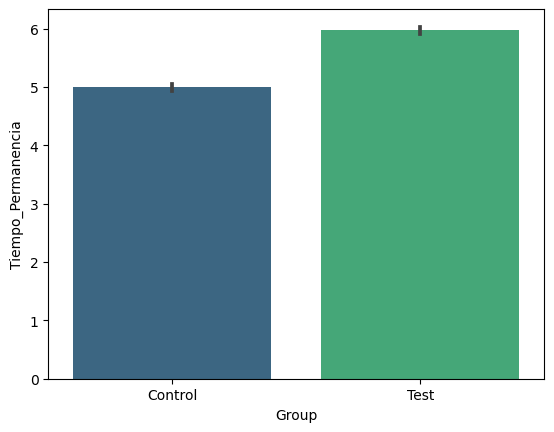

In [6]:
# analizamos los datos primero visualmente
sns.barplot(x="Group", y="Tiempo_Permanencia", data=df_z,  palette = "viridis");

In [7]:
# Calcular la media y la desviación estándar del grupo control
media_control_z = df_z[df_z['Group'] == 'Control']['Tiempo_Permanencia'].mean()
std_control_z = df_z[df_z['Group'] == 'Control']['Tiempo_Permanencia'].std()

# Calcular la media y la desviación estándar del grupo control
media_test_z = df_z[df_z['Group'] == 'Test']['Tiempo_Permanencia'].mean()
std_test_z = df_z[df_z['Group'] == 'Test']['Tiempo_Permanencia'].std()

# Calcular la cantidad de datos que tenemos en el grupo control y el test
n_control_z = len(df_z[df_z['Group'] == 'Control'])
n_test_z = len(df_z[df_z['Group'] == 'Test'])

# calcular el valor de la z
z_stat = (media_test_z - media_control_z) / np.sqrt((std_control_z**2 / n_control_z) + (std_test_z**2 / n_test_z))

# Calcular el valor p
p_value = 2 * (1 - norm.cdf(np.abs(z_stat)))

# Imprimir el resultado de la prueba
alpha = 0.05
if p_value < alpha:
    print("Hay una diferencia significativa en el tiempo de permanencia entre el grupo de control y el grupo de prueba.")
    print("\n ---------- \n")
    print("""
          Los resultados sugieren que si que existe una diferencia entre los grupos en la permanencia en la página web,
          por lo que tendremos quee optar por la nueva versión de la página web
          """)
else:
    print("No hay evidencia de una diferencia significativa en el tiempo de permanencia entre los grupos.")
    print("\n ---------- \n")
    print(""" 
          Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas,
          por lo que la nueva campaña no esta ayudando a nuestro problema. 
          """)


Hay una diferencia significativa en el tiempo de permanencia entre el grupo de control y el grupo de prueba.

 ---------- 


          Los resultados sugieren que si que existe una diferencia entre los grupos en la permanencia en la página web,
          por lo que tendremos quee optar por la nueva versión de la página web
          


# Prueba de proporciones

**Cuando la usaremos** :

- Cuando queramos comparar datos que están expresados en proporciones. 

Supongamos ahora que eres una especialista en marketing digital y estás interesada en mejorar la efectividad de los CTAs en tu sitio web para aumentar la tasa de clics. Decides realizar un A/B testing con dos versiones del botón de CTA: la versión actual (Grupo de Control) y una nueva versión con un diseño modificado (Grupo de Prueba).

Para realizar este análisis usaremos la prueba de chi-cuadrado. Si sintaxis básica es:

```python
from scipy.stats import chi2_contingency

# Aplicar la prueba de chi-cuadrado de independencia
chi2_stat, p_value, dof, expected = chi2_contingency(tabla_de_contingencia)
```

- `tabla_de_contingencia`: La tabla de contingencia, generalmente creada con funciones como `pd.crosstab`. Como aprendimos en lecciones previas. 

- `chi2_stat`: El estadístico de prueba chi-cuadrado.

- `p_value`: El valor p asociado al estadístico de prueba.

- `dof`: Grados de libertad.

- `expected`: La tabla de frecuencias esperadas bajo la hipótesis nula.

**Los resultados que obtenemos son:**

- **Estadístico de Prueba (chi2_stat):** Representa la magnitud de la diferencia entre las frecuencias observadas y esperadas. Un valor grande indica una mayor discrepancia y sugiere que hay evidencia de asociación entre las variables.

- **Valor p (p_value):** Representa la probabilidad de obtener un estadístico de prueba al menos tan extremo como el observado, asumiendo que las variables son independientes. Un valor p bajo (por ejemplo, < 0.05) sugiere que puedes rechazar la hipótesis nula de independencia.

- **Grados de Libertad (dof): **Indica el número de grados de libertad asociados con el estadístico de prueba. En general, es igual al producto de los grados de libertad en cada dimensión de la tabla menos uno.

- **Tabla de Frecuencias Esperadas (expected):** Contiene las frecuencias que se esperarían bajo la hipótesis nula de independencia. Comparar las frecuencias observadas con las esperadas puede ayudar a entender en qué celdas se observan las mayores desviaciones.

**Interpretación:**

- Si `p_value < 0.05`: Rechazamos la hipótesis nula. Hay evidencia suficiente para decir que hay una diferencia significativa entre las dos muestras.

- Si `p_value >= 0.05`: No hay evidencia suficiente para rechazar la hipótesis nula. No podemos afirmar que haya una diferencia significativa entre las dos muestras.

In [8]:
# Grupo de Control (versión actual del CTA)
total_visitas_control = 1000
clics_control = np.random.binomial(100, 0.03, total_visitas_control)  # Tasa de clics del 3%

# Grupo de Prueba (nueva versión del CTA)
total_visitas_prueba = 1000
clics_prueba = np.random.binomial(100, 0.04, total_visitas_prueba)  # Tasa de clics del 4%

# Crear un DataFrame
data_p = {
    'Grupo': ['Control'] * total_visitas_control + ['Prueba'] * total_visitas_prueba,
    'Clics': list(clics_control) + list(clics_prueba),
    'No_Clics': [100 - clics for clics in clics_control] + [100 - clics for clics in clics_prueba]
}
df_p = pd.DataFrame(data_p)
df_p.head()

,Grupo,Clics,No_Clics
0,Control,6,94
1,Control,1,99
2,Control,2,98
3,Control,2,98
4,Control,2,98


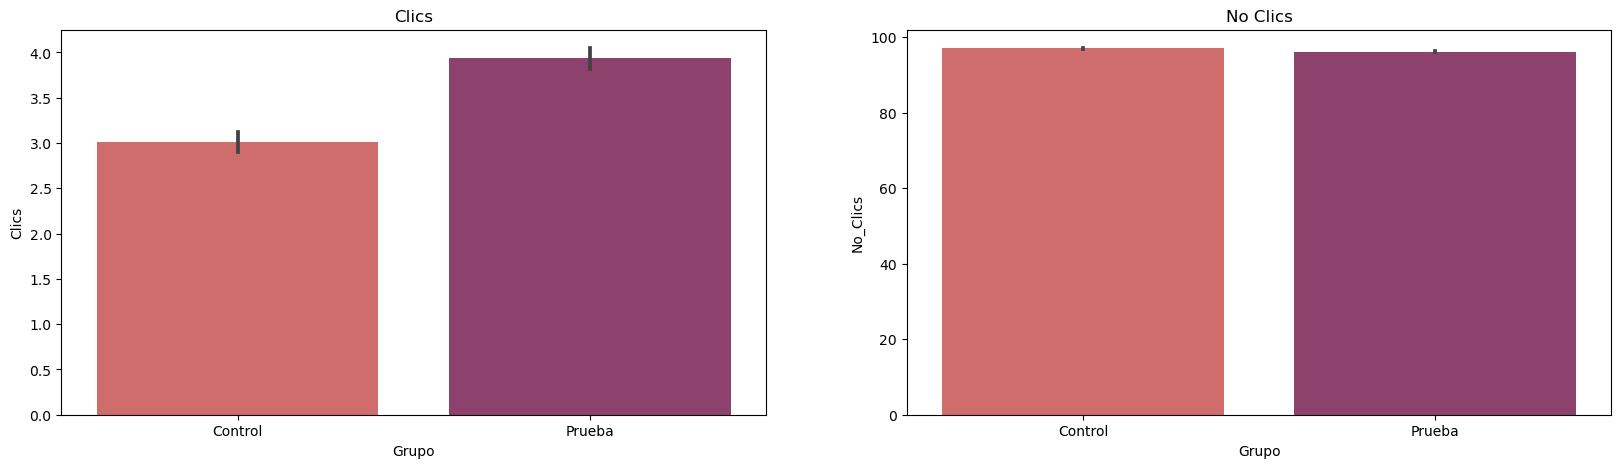

In [9]:
# hacemos un análisis visual previo
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

sns.barplot(x="Grupo", y="Clics", data=df_p,  palette = "flare", ax = axes[0])
sns.barplot(x="Grupo", y="No_Clics", data=df_p,  palette = "flare", ax = axes[1])

axes[0].set_title("Clics")
axes[1].set_title("No Clics");

In [10]:
# Crear una tabla de contingencia
contingency_table = pd.crosstab(df_p['Grupo'], df_p['Clics'])

# Realizar la prueba de proporciones
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Imprimir el resultado de la prueba
alpha = 0.05
if p_value < alpha:
    print("Hay una diferencia significativa en las tasas de clics entre el Grupo de Control y el Grupo de Prueba.")
    print("\n ---------- \n")
    print("""
          Los resultados sugieren que existe evidencia estadística para afirmar que las medias de las muestras son distintas. 
          Por lo tanto, nuestro nuevo sistema tiene los efectos deseados y deberíamos cambiar la nueva versión de anuncios   
          """)
else:
    print("No hay evidencia de una diferencia significativa en las tasas de clics entre los grupos.")
    print("\n ---------- \n")
    print(""" 
          Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas,
          por lo que la nueva campaña no esta ayudando a nuestro problema. 
          """)

Hay una diferencia significativa en las tasas de clics entre el Grupo de Control y el Grupo de Prueba.

 ---------- 


          Los resultados sugieren que existe evidencia estadística para afirmar que las medias de las muestras son distintas. 
          Por lo tanto, nuestro nuevo sistema tiene los efectos deseados y deberíamos cambiar la nueva versión de anuncios   
          


# Análisis de varianza (ANOVA)

**Cuando la usaremos**

- Cuando compares las medias de tres o más grupos independientes.

- Los datos tienen que cumplir los supuestos de normalidad, homogeneidad de varianzas e independencia. 


Supongamos que eres un analista de marketing digital y estás probando tres versiones diferentes de la página de inicio de tu sitio web para ver cuál tiene el mayor impacto en el tiempo promedio que los usuarios pasan en la página. Tienes tres grupos: el Grupo A ve la versión actual, el Grupo B ve una variación con cambios en el diseño, y el Grupo C ve otra variación con cambios en el contenido.

Su sintaxis básica es:

La función `f_oneway` en Python se encuentra en el módulo `scipy.stats` y se utiliza para realizar un análisis de varianza (ANOVA). Aquí está la sintaxis básica del método:

```python
from scipy.stats import f_oneway

# Aplicar ANOVA
resultado_anova = f_oneway(grupo_1, grupo_2, grupo_3)

# Imprimir resultados
print("Estadístico F:", resultado_anova.statistic)
print("Valor p:", resultado_anova.pvalue)
```

- `grupo_1`, `grupo_2`, `grupo_3`: Listas o arrays que representan las observaciones de cada grupo.

- `resultado_anova`: Objeto que contiene el resultado del análisis de varianza.

- `resultado_anova.statistic`: Estadístico F.

- `resultado_anova.pvalue`: Valor p asociado al estadístico F.



**Los resultados que obtenemos son:**

- **Estadístico F:** El estadístico F es el resultado principal de ANOVA. Representa la relación entre la variabilidad entre los grupos y la variabilidad dentro de los grupos. Un valor grande de F sugiere que al menos un par de medias son diferentes.

- **Valor p:** El valor p asociado al estadístico F indica la probabilidad de obtener un valor de estadístico F tan extremo como el observado, asumiendo que las medias de todos los grupos son iguales. Un valor p pequeño (< 0.05) sugiere que puedes rechazar la hipótesis nula de igualdad de medias.


**Interpretación:**

- Si `p_value < 0.05`: Rechazamos la hipótesis nula. Hay evidencia suficiente para decir que hay una diferencia significativa entre las dos muestras.

- Si `p_value >= 0.05`: No hay evidencia suficiente para rechazar la hipótesis nula. No podemos afirmar que haya una diferencia significativa entre las dos muestras.

In [11]:
# generamos los datos ficticios del Grupo A (versión actual)
grupo_a = np.random.normal(60, 10, 100)

# generamos los datos ficticion del Grupo B (variación de diseño)
grupo_b = np.random.normal(65, 10, 100)

# generamos los datos ficticios del Grupo C (variación de contenido)
grupo_c = np.random.normal(55, 10, 100)

# Crear DataFrame
df_anova = pd.DataFrame({
    'Grupo': ['A'] * 100 + ['B'] * 100 + ['C'] * 100,
    'Tiempo_Promedio': np.concatenate([grupo_a, grupo_b, grupo_c])
})

# Visualizar los primeros registros del DataFrame
df_anova.sample(6)

,Grupo,Tiempo_Promedio
127,B,71.711504
60,A,62.664824
153,B,66.341257
63,A,61.512977
49,A,52.323681
105,B,69.333873


<Axes: xlabel='Grupo', ylabel='Tiempo_Promedio'>

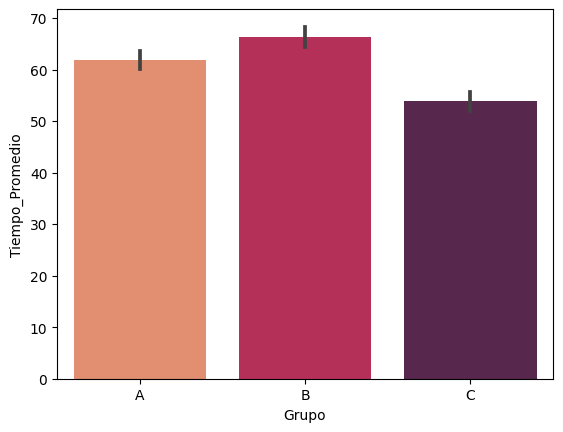

In [75]:
# analizamos los datos primero visualmente
sns.barplot(x="Grupo", y="Tiempo_Promedio", data=df_anova,  palette = "rocket_r")

In [12]:
anova_resultado = f_oneway(df_anova['Tiempo_Promedio'][df_anova['Grupo'] == 'A'],
                            df_anova['Tiempo_Promedio'][df_anova['Grupo'] == 'B'],
                            df_anova['Tiempo_Promedio'][df_anova['Grupo'] == 'C'])

# Imprimir resultados
print("Estadístico F:", anova_resultado.statistic)
print("Valor p:", anova_resultado.pvalue)

# Interpretar los resultados
alpha = 0.05
if anova_resultado.pvalue < alpha:
    print("Hay diferencias significativas en el tiempo promedio entre al menos dos grupos.")
    print("\n ---------- \n")
    print("""
          Los resultados sugieren que existe evidencia estadística para afirmar que las medias de las muestras son distintas. 
          Por lo tanto, nuestro nuevo sistema tiene los efectos deseados y deberíamos cambiar la nueva versión de anuncios   
          """)

else:
    print("No hay evidencia de diferencias significativas en el tiempo promedio entre los grupos.")
    print("\n ---------- \n")
    print(""" 
          Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas,
          por lo que la nueva campaña no esta ayudando a nuestro problema. 
          """)

Estadístico F: 29.916728697116163
Valor p: 1.4561157185894195e-12
Hay diferencias significativas en el tiempo promedio entre al menos dos grupos.

 ---------- 


          Los resultados sugieren que existe evidencia estadística para afirmar que las medias de las muestras son distintas. 
          Por lo tanto, nuestro nuevo sistema tiene los efectos deseados y deberíamos cambiar la nueva versión de anuncios   
          


# Regresión Lineal

La empresa introdujo una nueva función de chat en vivo en su sitio web para mejorar la comunicación con los clientes. Quieren entender cómo el tiempo que los usuarios pasan utilizando esta función (variable independiente) se relaciona con la tasa de conversión (variable dependiente). La variable independiente será el tiempo que los usuarios pasan interactuando con la nueva característica, y la variable dependiente será la tasa de conversión.


**Interpretación:**

- **Coeficiente (pendiente):** Representa el cambio promedio en la tasa de conversión por cada unidad adicional de tiempo de interacción.

- **Intercepto:** Es la estimación de la tasa de conversión cuando el tiempo de interacción es cero.

- **Puntaje R^2:** Indica cuánta variabilidad en la tasa de conversión es explicada por el modelo. Un puntaje R^2 más cercano a 1 sugiere un buen ajuste.



In [13]:
# Crear datos ficticios
np.random.seed(42)
tiempo_interaccion = np.random.uniform(0, 30, 100)
tasa_conversion = 0.05 * tiempo_interaccion + 0.02 * np.random.normal(size=100)

# Crear DataFrame
df_rl = pd.DataFrame({'Tiempo_Interaccion': tiempo_interaccion, 'Tasa_Conversion': tasa_conversion})

# Visualizar los primeros registros del DataFrame
df_rl.head()

,Tiempo_Interaccion,Tasa_Conversion
0,11.236204,0.563551
1,28.521429,1.420091
2,21.959818,1.099826
3,17.959755,0.858236
4,4.680559,0.229635


In [14]:
# Separar variables independientes y dependientes
X = df_rl[['Tiempo_Interaccion']]
y = df_rl['Tasa_Conversion']

# Inicializar y entrenar el modelo de regresión lineal
modelo_regresion = LinearRegression()
modelo_regresion.fit(X, y)

# Imprimir coeficientes y puntaje R^2
print(f"Coeficiente (pendiente): {modelo_regresion.coef_[0]:.4f}")
print(f"Intercepto: {modelo_regresion.intercept_:.4f}")
print(f"Puntaje R^2: {modelo_regresion.score(X, y):.4f}")

Coeficiente (pendiente): 0.0497
Intercepto: 0.0043
Puntaje R^2: 0.9983
